In [8]:
#!/usr/bin/env python
# coding: utf-8

# In[34]:


#!/usr/bin/env python
# coding: utf-8

###
# Pipeline:  Converting data via the IDE
# URI: https://DataDrivenConstruction.io/
# Description: Determination by parameter in the group model, to find CO2 emissions
# Input:  collada files, Table
# Output: CO2 table, collada files
# DataDrivenConstruction
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
###

import os, subprocess
import time

############################   Parameters    ############################

# path to noBIM converter
path_conv = r'C:\DataDrivenConstruction\ODBLite\ODB_noBIM_Lite_v1_3\\'

# path to files
path = r'C:\DataDrivenConstruction\DATA\Sample\Data\Revit\\'
# output path
outpath = path



#########################################################################

# Folders where the converter and conversion files are located
conv_IfcToCsv = path_conv + 'IfcToCsv.exe'
conv_IfcColladaExporter = path_conv + 'IfcColladaExporter.exe'
conv_RvtToCsv = path_conv + 'RvtToCsv.exe'
conv_RvtColladaExporter = path_conv + 'RvtColladaExporter.exe'

def convert(path, path_conv, outpath):
    try: os.mkdir(outpath)
    except: pass

    # Conversion process from RVT and IFC in DAE
    for file in os.listdir(path):
        if file.endswith('.ifc'):
            subprocess.Popen([conv_IfcToCsv, path + file, outpath + file[:-3]+'csv'], cwd = path_conv)
            subprocess.Popen([conv_IfcColladaExporter, path + file, outpath + file[:-3]+'dae'], cwd = path_conv)
            print("Conversion Done: " + file[:-3]+'csv' + ', ' + file[:-3]+'dae' )
        if file.endswith('.rvt'):
            subprocess.Popen([conv_RvtColladaExporter, path + file, outpath + file[:-3]+'dae'], cwd = path_conv)
    # Conversion process from RVT in CSV        
    for file in os.listdir(path):
        if file.endswith('.rvt'):
            while not os.path.exists(outpath + file[:-3]+'dae'):
                time.sleep(0.5)
            print("Conversion Done: " + file[:-3]+'dae' )
            while not os.path.getsize(outpath + file[:-3]+'dae') > 100000:
                time.sleep(0.5)
            subprocess.Popen([conv_RvtToCsv, path + file, outpath + file[:-3]+'dae', outpath + file[:-3]+'csv'], cwd = path_conv)
            print("Conversion Done: " + file[:-3]+'csv')        
    return



1
2
Conversion Done: rst_advanced_sample_project.dae
Conversion Done: rst_advanced_sample_project.csv
3


C:\Users\Artem\AppData\Local\Temp\ipykernel_18288\1904055262.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax1 = df.groupby('Type Name').mean().plot(y=['Length'], kind="barh", fontsize = 12)


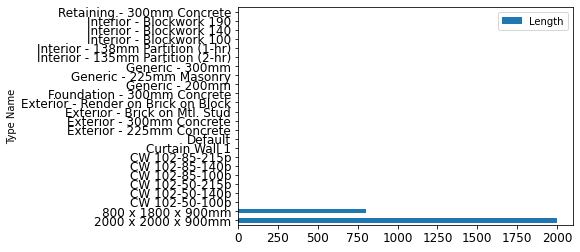

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
#to work without running Revit and API you need to download the noBIM Lite

# path to noBIM converter
path_conv = r'C:\DataDrivenConstruction\ODBLite\noBIM_Lite_v1_23-v2jfja\\'
# path to files
path = r'C:\DataDrivenConstruction\DATA\Sample\Revit\\'
# output path
outpath = path

#conversion without using plugins and APIs
convert(path, path_conv, outpath)

#Creating barh images
for file in os.listdir(path):
    if file.endswith('.csv'):
        df = pd.read_csv(path+file, encoding='cp1252')
        ax1 = df.groupby('Type Name').mean().plot(y=['Length'], kind="barh", fontsize = 12)
        plt.savefig(path+'table_vol.png')

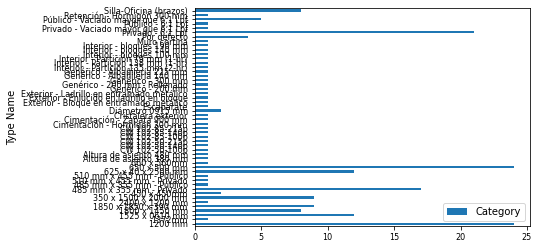

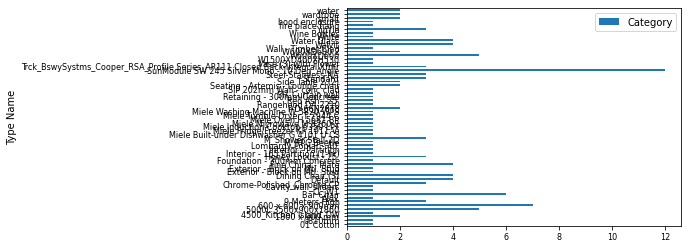

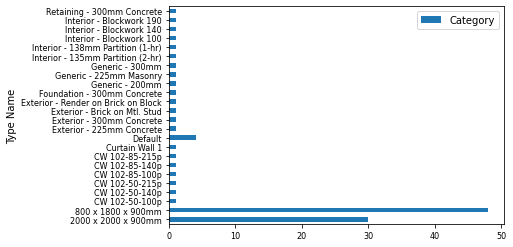

In [45]:
#Creating barh images for count of elemets in Type Name
for file in os.listdir(path):
    if file.endswith('.csv'):
        df = pd.read_csv(path+file, encoding='cp1252')
        ax1 = df.groupby('Type Name').count().plot(y=['Category'], kind="barh", fontsize = 8)
        plt.savefig(path+'table_vol_count.png')

In [ ]:
# More examples are on the website:
# https://DataDrivenConstruction.io/index.php/data-handling-in-construction/